In [1]:
!pip install ../dist/rekomenda-0.1.0-py3-none-any.whl --quiet

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import csv
from collections import Counter

from rekomenda.coo import COOMatrix
from rekomenda.csr import CSRMatrix
from rekomenda.csc import CSCMatrix
from rekomenda.als import ALSMetrics, BiasOnlyALS, LatentFactorALS, OptimizedLatentFactorALS
from rekomenda.utils import load_data

In [3]:
train, test  = load_data(filepath='../ml-32m/ratings.csv', split_ratio=0.8)

In [4]:
train_csr, test_csr = CSRMatrix.from_coo(train), CSRMatrix.from_coo(test)

In [5]:
train_csc, test_csc = CSCMatrix.from_coo(train), CSCMatrix.from_coo(test)

In [6]:
train_als = OptimizedLatentFactorALS(lambda_reg=0.1, n_factors=2, use_parallel=True)

In [7]:
start = time.time()
train_als.fit(csr_matrix=train_csr, csc_matrix=train_csc,n_iterations=60,compute_metrics_every=5)
end = time.time()

print(f"Total time taken {end - start}")

Iteration 5/60 - RMSE: 0.7892, NLL: 8015694.0314
Iteration 10/60 - RMSE: 0.7856, NLL: 7936987.0204
Iteration 15/60 - RMSE: 0.7851, NLL: 7923974.5401
Iteration 20/60 - RMSE: 0.7850, NLL: 7918705.9072
Iteration 25/60 - RMSE: 0.7849, NLL: 7915796.7577
Iteration 30/60 - RMSE: 0.7849, NLL: 7913837.0858
Iteration 35/60 - RMSE: 0.7849, NLL: 7912383.8727
Iteration 40/60 - RMSE: 0.7849, NLL: 7911258.0855
Iteration 45/60 - RMSE: 0.7849, NLL: 7910353.1742
Iteration 50/60 - RMSE: 0.7849, NLL: 7909611.3898
Iteration 55/60 - RMSE: 0.7849, NLL: 7908978.9095
Iteration 60/60 - RMSE: 0.7849, NLL: 7908451.1298
Total time taken 818.822046995163


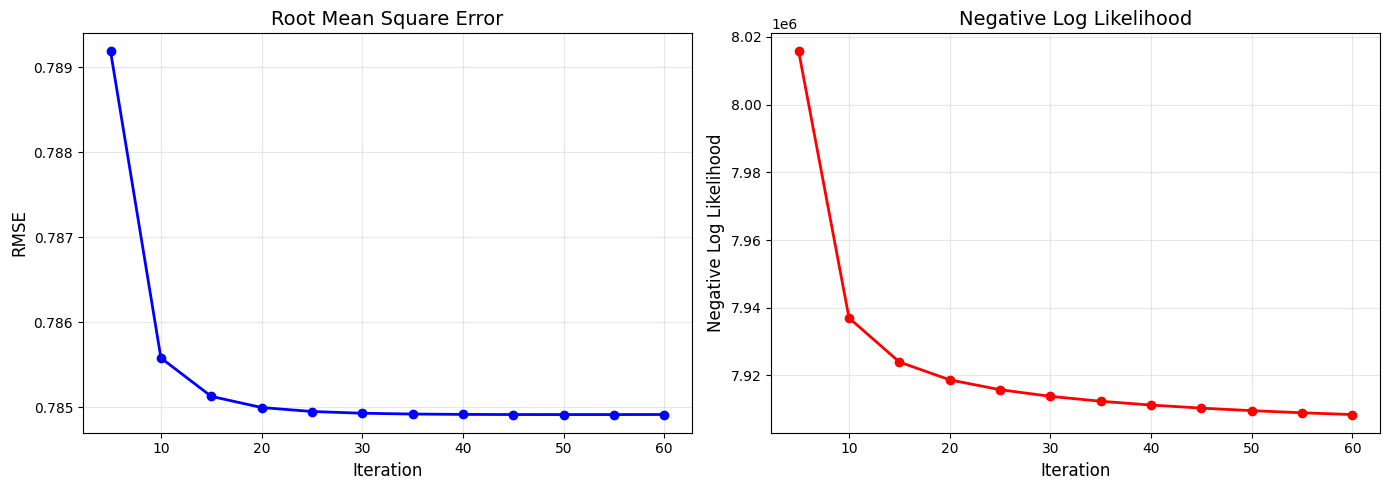

In [8]:
train_als.plot_metrics(output='pics/als-bias-with-latent-train-32m.pdf')